<a href="https://colab.research.google.com/github/lgcaobianco/udacityMLE/blob/master/titanic_survival_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import sys
sys.path.insert(0, '/home/lgcaobianco/repositorios/courses/udacity-MLE/titanic-example')
import visuals as vs

In [0]:
#import data and check if operation was successful
full_data = pd.read_csv('/home/lgcaobianco/repositorios/courses/udacity-MLE/titanic-example/titanic_data.csv')
full_data.head()
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis=1)

#Creating function that measures accuracy

In [0]:
def measure_accuracy(truth, pred):
  """ returns accuracy of prediction """
  if len(truth) == len(pred):
    return "prediction has an accuracy of {:.2f}%".format((truth==pred).mean() * 100)
  else:
    return "data differs in length!"

#Creating first prediction

The first module with make predictions based only on the passenger's sex

In [19]:
def prediction_1(data):
  """ prediction based on passenger sex:"""
  predictions = []
  for _, passenger in data.iterrows():
    if(passenger['Sex'] == 'male'):
      predictions.append(0)
    else:
      predictions.append(1)
  
  return pd.Series(predictions)
predictions = prediction_1(data)
print(measure_accuracy(outcomes, predictions))

prediction has an accuracy of 78.68%


#Refining model
##Closer look at passenger classes
If passenger classes are evaluated, it will be noted that most women in classes 1 and 2 have survived,  and most men in classes 2 and 3 have perished. Women in class 3 will be analysed further.

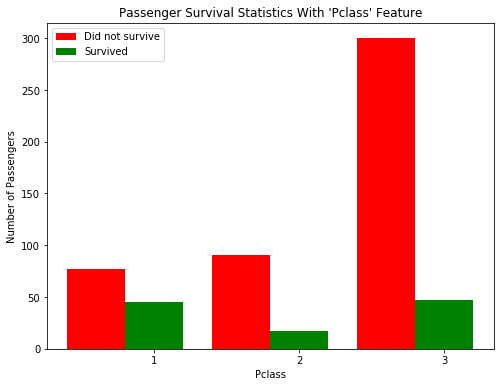

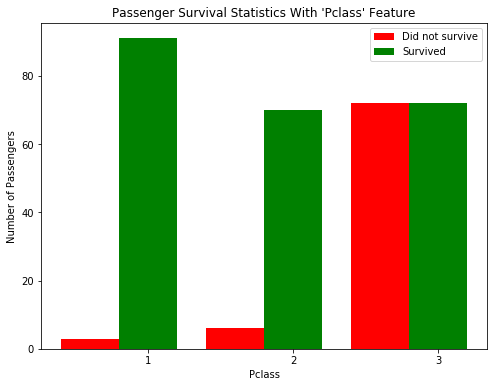

In [20]:
vs.survival_stats(data, outcomes, 'Pclass', ["Sex == 'male'"])
vs.survival_stats(data, outcomes, 'Pclass', ["Sex == 'female'"])

As it can be noted, survival data of women in class 3 and men in class 1 need further analysis

##Men in class 1
As it can be noted below, men with $Age >40$ had smaller chance of surviving

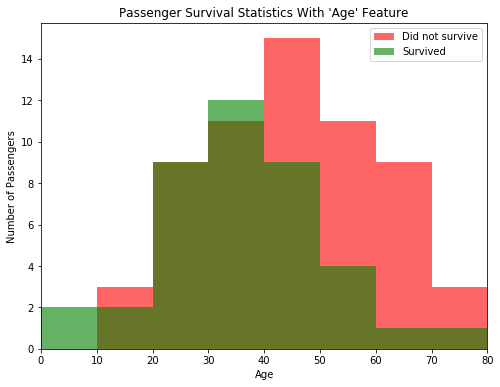

In [21]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'", "Pclass == 1"])

##Women in class 3

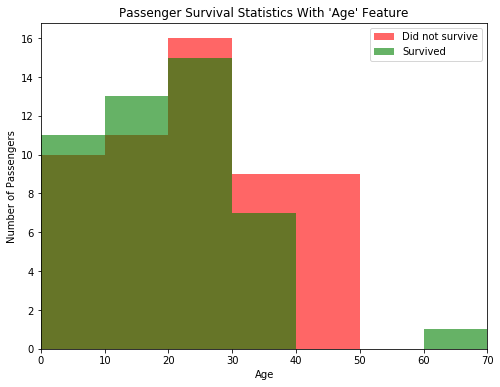

In [22]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'female'", "Pclass == 3"])

As shown, women with age between 40 and 50 didn't survive.

In [23]:
def prediction_2(data):
  """ this model will take in consideration classes of passengers"""
  predictions = []
  for _, passenger in data.iterrows():
    if(passenger['Sex'] == 'male'):
      if(passenger['Pclass'] == 1):
        if(passenger['Age'] <= 40):
          predictions.append(1)
        else:
          predictions.append(0)
      else:
        predictions.append(0)
    else:
      if(passenger['Pclass'] <= 2):
        predictions.append(1)
      else:
        if(passenger['Age'] >= 40 or passenger['Age'] <= 50):
          predictions.append(0)
        else:
          predictions.append(1)
  return predictions

predictions = prediction_2(data)
print(measure_accuracy(outcomes, predictions))

prediction has an accuracy of 79.69%


##Taking a deeper look at women with $Age \leq 40$ 

It is possible to see that women with $Fare \leq 20$ had a bigger chance of survival.**bold text**

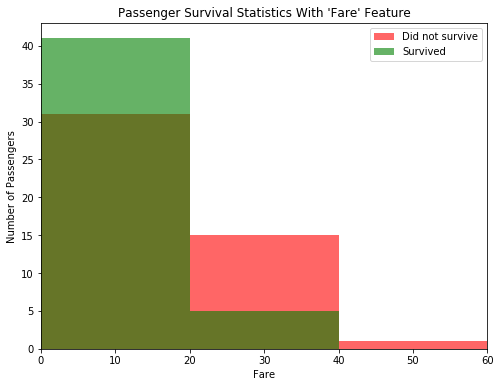

In [24]:
vs.survival_stats(data, outcomes, 'Fare', ["Sex == 'female'", "Pclass == 3", "Age <= 40"])

## Final model
So we change the model, adding the newly discovered  *criterium*

In [25]:
def prediction_3(data):
  """ this model will take in consideration classes of passengers"""
  predictions = []
  for _, passenger in data.iterrows():
    if(passenger['Sex'] == 'male'):
      if(passenger['Pclass'] == 1):
        if(passenger['Age'] <= 40):
          predictions.append(1)
        else:
          predictions.append(0)
      else:
        predictions.append(0)
    else:
      if(passenger['Pclass'] <= 2):
        predictions.append(1)
      else:
        if(passenger['Age'] >= 40 or passenger['Age'] <= 50):
          predictions.append(0)
        else:
          if(passenger['Fare'] <= 20):
            predictions.append(1)
          else:
            predictions.append(0)
  return predictions

predictions = prediction_3(data)
print(measure_accuracy(outcomes, predictions))

prediction has an accuracy of 80.02%


and the proposed accuracy has been achieved.